Epoch 0, w = 1.7488, bias = 0.2643, MSE = 215.2218
Epoch 100, w = 2.2272, bias = 1.2023, MSE = 4.3014
Epoch 200, w = 2.1510, bias = 1.7281, MSE = 4.0117
Epoch 300, w = 2.1040, bias = 2.0529, MSE = 3.9011
Epoch 400, w = 2.0749, bias = 2.2537, MSE = 3.8589
Epoch 500, w = 2.0569, bias = 2.3777, MSE = 3.8427
Epoch 600, w = 2.0458, bias = 2.4544, MSE = 3.8366
Epoch 700, w = 2.0390, bias = 2.5017, MSE = 3.8342
Epoch 800, w = 2.0347, bias = 2.5310, MSE = 3.8333
Epoch 900, w = 2.0321, bias = 2.5491, MSE = 3.8330

Paramètres finaux: w = 2.0305, bias = 2.5602
MSE sur train set: 3.8328
MSE sur test set: 6.8094
R² sur test set: 0.8122


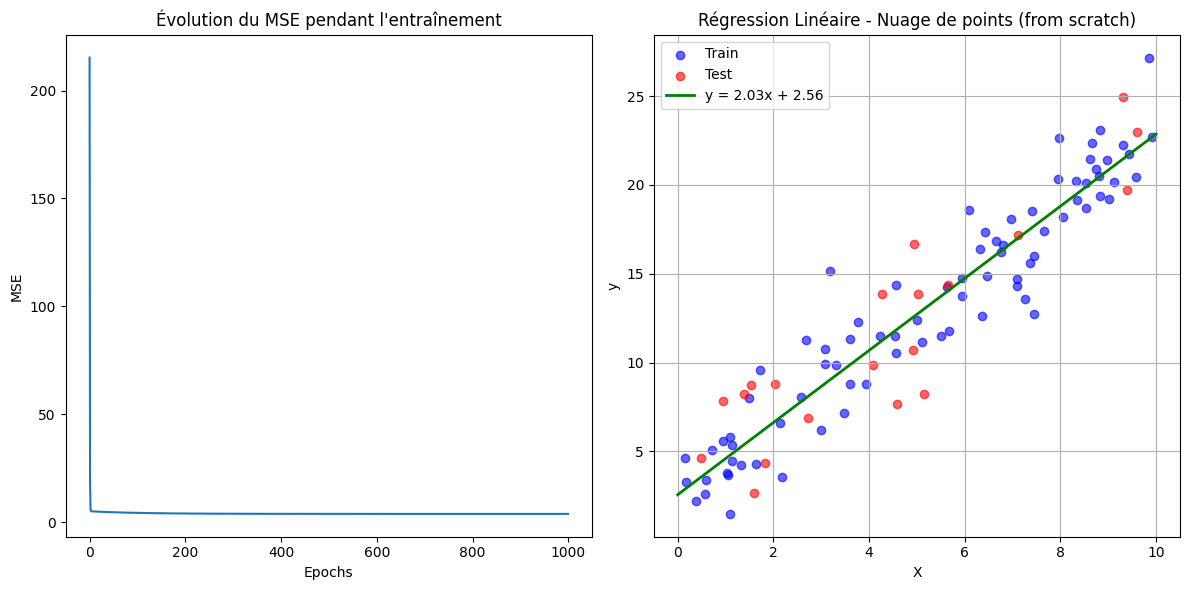

In [11]:
# Nuage de points from scratch

import numpy as np
import matplotlib.pyplot as plt

# Génération des données
np.random.seed(44)
X = np.random.rand(100) * 10  
bruit = np.random.randn(100) * 2  
y = 2 * X + 3 + bruit  

X = X.reshape(-1, 1)

# Division en ensembles d'entraînement et de test
def split_data(X, y, test_size=0.2):
    n = len(X)
    indices = np.arange(n)
    np.random.shuffle(indices)
    test_count = int(n * test_size)
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = split_data(X, y)

# Régression linéaire par descente de gradient
def fit(X, y, learning_rate=0.01, epochs=1000):
    n = len(y)
    w = 0
    bias = 0
    mse_list = []

    for epoch in range(epochs):
        y_pred = bias + w * X.flatten()
        error = y - y_pred
        mse = np.mean(error ** 2)
        mse_list.append(mse)

        # Calcul des gradients
        grad_bias = -(2/n) * np.sum(error)
        grad_w = -(2/n) * np.sum(X.flatten() * error)

        # Mise à jour des paramètres
        bias -= learning_rate * grad_bias
        w -= learning_rate * grad_w

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, w = {w:.4f}, bias = {bias:.4f}, MSE = {mse:.4f}")

    return bias, w, mse_list

# Entraînement du modèle
bias, w, mse_list = fit(X_train, y_train)

# Prédictions et évaluation
y_pred_train = bias + w * X_train.flatten()
y_pred_test = bias + w * X_test.flatten()

mse_train = np.mean((y_train - y_pred_train) ** 2)
mse_test = np.mean((y_test - y_pred_test) ** 2)
r2_test = 1 - np.sum((y_test - y_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2)

print(f"\nParamètres finaux: w = {w:.4f}, bias = {bias:.4f}")
print(f"MSE sur train set: {mse_train:.4f}")
print(f"MSE sur test set: {mse_test:.4f}")
print(f"R² sur test set: {r2_test:.4f}")

# Visualisation
plt.figure(figsize=(12, 6))

# Évolution du MSE
plt.subplot(1, 2, 1)
plt.plot(mse_list)
plt.title("Évolution du MSE pendant l'entraînement")
plt.xlabel("Epochs")
plt.ylabel("MSE")

# Visualisation de la régression
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Train', alpha=0.6)
plt.scatter(X_test, y_test, color='red', label='Test', alpha=0.6)

# Ligne de régression
x_line = np.array([0, 10])
y_line = bias + w * x_line
plt.plot(x_line, y_line, color='green', linewidth=2, label=f'y = {w:.2f}x + {bias:.2f}')

plt.title('Régression Linéaire - Nuage de points (from scratch)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()